Saving 1. Predict Loan Default.csv to 1. Predict Loan Default (1).csv


<ipython-input-1-40299cebf0f5>:30: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})


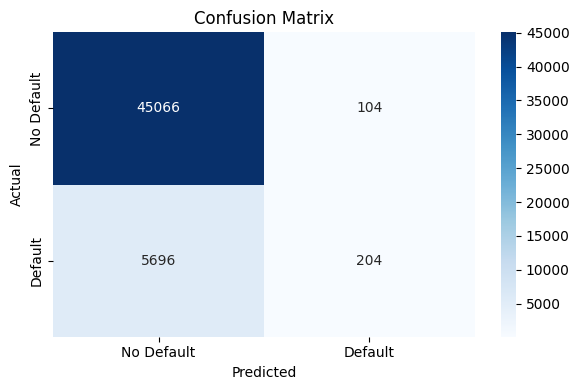

,precision,recall,f1-score,support
0,0.887790,0.997698,0.939541,45170.00000
1,0.662338,0.034576,0.065722,5900.00000
accuracy,0.886430,0.886430,0.886430,0.88643
macro avg,0.775064,0.516137,0.502631,51070.00000
weighted avg,0.861744,0.886430,0.838590,51070.00000


In [1]:
# Step 1: Install necessary packages (optional in Colab)
!pip install seaborn scikit-learn --quiet

# Step 2: Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report

# Step 3: Load the dataset
# You can upload manually in Colab using the widget
from google.colab import files
uploaded = files.upload()

# Replace with the actual filename if different
df = pd.read_csv("1. Predict Loan Default.csv")

# Step 4: Data Preprocessing
df = df.drop(columns=["LoanID"])  # Drop ID column

# Convert 'Yes'/'No' to 1/0
binary_columns = ['HasMortgage', 'HasDependents', 'HasCoSigner']
df[binary_columns] = df[binary_columns].replace({'Yes': 1, 'No': 0})

# Define features and target
X = df.drop(columns=['Default'])
y = df['Default']

# Identify column types
categorical_cols = ['Education', 'EmploymentType', 'MaritalStatus', 'LoanPurpose']
numeric_cols = X.select_dtypes(include=['int64', 'float64']).columns.difference(binary_columns)

# Step 5: Build pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough'  # Leave binary columns as-is
)

clf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Step 6: Train/Test Split and Fit
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
clf.fit(X_train, y_train)

# Step 7: Predictions and Evaluation
y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)

# Step 8: Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

# Step 9: Print Evaluation Metrics
report_df = pd.DataFrame(report).transpose()
display(report_df)
